In [ ]:
install.packages("ggpubr")


Installing package into ‘/datasets/_deepnote_work/.R/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Matrix’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘pillar’, ‘tibble’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘rlang’, ‘vctrs’, ‘cli’, ‘dplyr’, ‘lifecycle’, ‘purrr’, ‘stringr’, ‘tidyselect’, ‘corrplot’, ‘car’, ‘ggplot2’, ‘ggrepel’, ‘ggsci’, ‘tidyr’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’


Warning message in install.packages("ggpubr"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘carData’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘lifecycle’ had non-zero exit status”
Warning mess

In [ ]:
library(tidyverse)
library(ggpubr)
library(rstatix)

ERROR: Error in library(ggpubr): there is no package called ‘ggpubr’


In [ ]:
data <- read.csv('spotitexercise_data.txt')
data %>% count(repaid)
data1 <- data %>% filter(funded == 1)
data1 <- data1 %>% filter(!is.na(repaid))

repaid,n
<int>,<int>
0,2354
1,2073
NA,614


In [ ]:
colnames(data1)

[1] "boostingbid_bythefirm"  "loan_amount_asked"      "final_avg_int_rate"    
 [4] "borrower_maximum_int"   "provider"               "impact_poverty"        
 [7] "impact_womenrights"     "impact_sustainability"  "sect_fishingfarming"   
[10] "sect_manufacturing"     "sect_services"          "sect_rawmaterials"     
[13] "funded"                 "repaid"                 "info_images"           
[16] "country_main_mkt"       "info_documents"         "payback_max1year"      
[19] "larger_proj"            "seeking_partners"       "impact_social_residual"

### Loan amount asked 

In [ ]:
group_means_loan <-
  data1 %>%
  group_by(repaid) %>%
  summarise(avg_loans = mean(loan_amount_asked),
            n = n())

group_means_loan

repaid,avg_loans,n
<int>,<dbl>,<int>
0,2319.160,2354
1,1192.491,2073


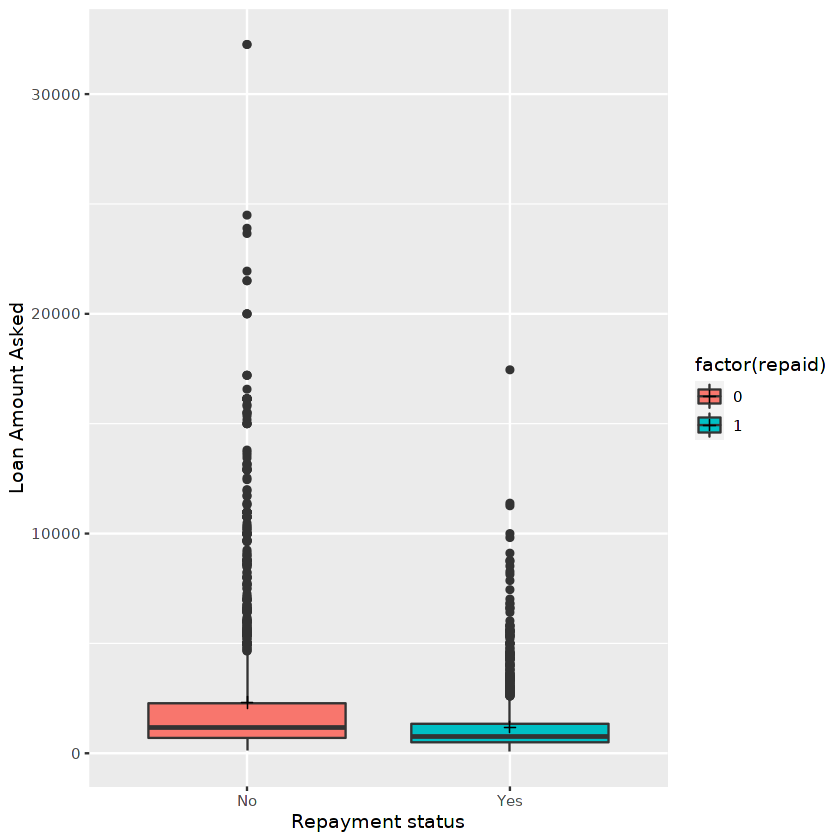

In [ ]:
data1 %>%
  ggplot(aes(x = factor(repaid), y = loan_amount_asked, fill = factor(repaid))) +
  geom_boxplot() +

  # Add the mean for each group
  geom_point(data = group_means_loan,
             aes(x = factor(repaid), y = avg_loans),
             shape = 3,
             size = 2) + 
                labs(x = "Repayment status", y = "Loan Amount Asked") + 
    scale_x_discrete(labels = c("0" = "No", "1" = "Yes"))

In [ ]:
#T-test

stat.test <- data1 %>% 
  t_test(loan_amount_asked ~ repaid) %>%
  add_significance()
stat.test

stat.test <- stat.test %>% add_xy_position(x = "Repayment status")


ERROR: Error in add_significance(.): could not find function "add_significance"


In [ ]:
bxp <- ggboxplot(
  data1, x = "group", y = "weight", 
  ylab = "Weight", xlab = "Groups", add = "jitter") + 
  stat_pvalue_manual(stat.test, tip.length = 0) +
  labs(subtitle = get_test_label(stat.test, detailed = TRUE))

### Provider's role

In [ ]:
#Graph for Projects per provider
provider_projects <- data %>% filter(!is.na(repaid)) %>% group_by(provider) %>% summarise(n_proj=n(), )

ggplot(provider_projects, aes(x = factor(provider), y = n_proj)) + 
    geom_histogram(stat = "identity", fill = "skyblue")

In [ ]:
providers_role <- data %>% filter(!is.na(repaid)) %>% group_by(provider) %>% summarise(repaid_rate=sum(repaid == 1)/n())

#Graph for repayment rate per provider
ggplot(providers_role, aes(x = repaid_rate, y = factor(provider))) +
  geom_histogram(stat = "identity", fill = "blue")

In [ ]:
p <- ggplot(data_long, aes(x = Provider, y = Value, fill = Metric)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  labs(x = "Providers", y = "Projects Done (Standardized)", fill = "") +
  scale_fill_manual(values = c("blue", "green"), name = "Metric",
                    labels = c("Projects Done", "Repaid Rate")) +
  theme_minimal()



### Boosting bid by the firm

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=daed34fc-226e-4d0c-93e0-93bc5ec19f10' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>